In [1]:
import json
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('other_jsons/sanskrit_dict.json','r') as json_file:
    dictionary = json.load(json_file)

with open('other_jsons/word_freq.json', 'r') as json_file:
    count_lookup = json.load(json_file)

with open('other_jsons/time.json', 'r') as json_file:
    time_lookup = json.load(json_file)
    
word_list = [key for key,value in dictionary.items()]


In [3]:
word = random.choice(word_list)

In [79]:
def graph_this(word, ax, label, offset=0, color='#F4C430', abs=True, yr_range=[-1500, 1200]):
    buckets = np.array(27 * [0])
    word_info = count_lookup.get(f'{word}', [])

    if len(word_info):
        for book_info in word_info:
            book_name = book_info['name']
            time = time_lookup.get(f'{book_name}', (0, 0))
            idx_range = [(time[0] // 100) + 15, (time[1] // 100) + 15]
            count = book_info['count']
            for idx in range(idx_range[0], idx_range[1]):
                buckets[idx] += count

        total = np.sum(buckets)
        for i in range(len(buckets)):
            if not abs:
                buckets[i] = buckets[i] * 100 / total

        req_start_idx = (max(yr_range[0], -1500) // 100) + 15
        req_end_idx = (min(yr_range[1], 1200) // 100) + 15
        bucket_labels = [i for i in range(max(yr_range[0], -1500), min(yr_range[1], 1200), 100)]
        bucket_width = np.diff(bucket_labels) * 0.4  # Reduce width to fit two bars side by side

        # Shift the position of the bars by the offset
        ax.bar(np.array(bucket_labels[:-1]) + offset, buckets[req_start_idx: req_end_idx - 1], width=bucket_width, edgecolor='black', align='edge', color=color, label=label)
        ax.set_xlabel('Years')
        if not abs:
            ax.set_ylabel('Percentage of occurrences')
        else:
            ax.set_ylabel('Frequency of occurrences')

    else:
        print("Occurrence of the word not profiled yet")

In [56]:
import colorsys
import random

def generate_distinct_colors(n):
    colors = []
    for i in range(n):
        # Generate evenly spaced hues
        hue = i / n
        rgb = colorsys.hsv_to_rgb(hue, 1.0, 1.0)  # Full saturation and value
        # Convert RGB from 0-1 range to 0-255 and format as hex
        hex_color = "#{:02X}{:02X}{:02X}".format(int(rgb[0] * 255), int(rgb[1] * 255), int(rgb[2] * 255))
        # Ensure white is not in the list
        if hex_color != "#FFFFFF":
            colors.append(hex_color)

    # Shuffle to avoid sequential hues
    random.shuffle(colors)
    return colors


In [83]:
word2 = "akaly\u0101\u1e47a"
word3 = "akara\u1e47a"

In [80]:
def graph_these(words, abs = True, yr_range = [-1500,1200]):
    fig, ax = plt.subplots()
    n = len(words)
    offsets = [(i*20)-(n-1)*10 for i in range(n)]
    colors = generate_distinct_colors(n)
    for i in range(n):
        graph_this(words[i], ax, abs=abs,yr_range=yr_range, label = f"{words[i]}", offset = offsets[i], color=colors[i])
    ax.legend()
    plt.show()

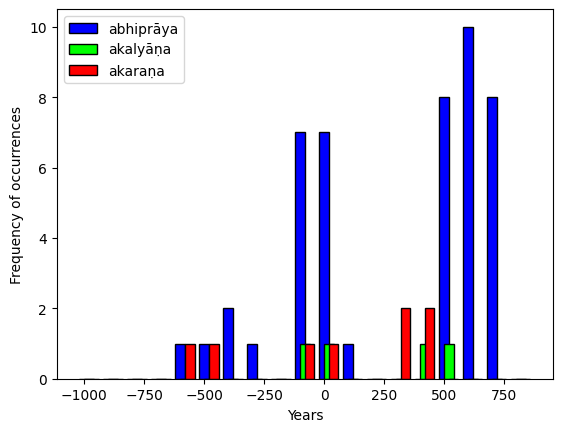

In [84]:
graph_these([word, word2, word3], abs=True, yr_range=[-1000,1000])

In [8]:
word_info

[{'name': 'Arthaśāstra',
  'examples': ['āśrayakārī sampannaghātī pārṣṇir āsāro madhyama udāsīno vā pratikartavyaḥ saṃkaṭo mārgaḥ śodhayitavyaḥ kośo daṇḍo mitrāmitrāṭavībalaṃ viṣṭir ṛtur vā pratīkṣyāḥ kṛtadurgakarmanicayarakṣākṣayaḥ krītabalanirvedo mitrabalanirvedaś cāgamiṣyati upajapitāro vā nātitvarayanti śatrur abhiprāyaṃ vā pūrayiṣyati iti śanair yāyāt viparyaye śīghram '],
  'count': 1},
 {'name': 'Atharvaprāyaścittāni',
  'examples': ['yadi prayāyād anugacched vā saṃvatsaraṃ saṃvatsarābhiprāyo vā yadi tvared brahmaudanaṃ paktvā punaḥ samidham abhyādadhyāt '],
  'count': 1},
 {'name': 'Aṣṭasāhasrikā',
  'examples': ["teṣāṃ vigrahītukāmānāṃ vivaditukāmānāṃ virodhayitukāmānāṃ na te 'bhiprāyāḥ paripūriṃ gamiṣyanti ",
   "teṣāṃ vigrahītukāmānāṃ vivaditukāmānāṃ virodhayitukāmānāṃ na te 'bhiprāyāḥ paripūriṃ gamiṣyanti ",
   'atha khalvanyatīrthyānāṃ parivrājakānām upālambhābhiprāyāṇāṃ śataṃ tasyāṃ velāyāṃ yena bhagavāṃstenopasaṃkrāmati sma '],
  'count': 8},
 {'name': 'Aṣṭādhyāyī',
  '